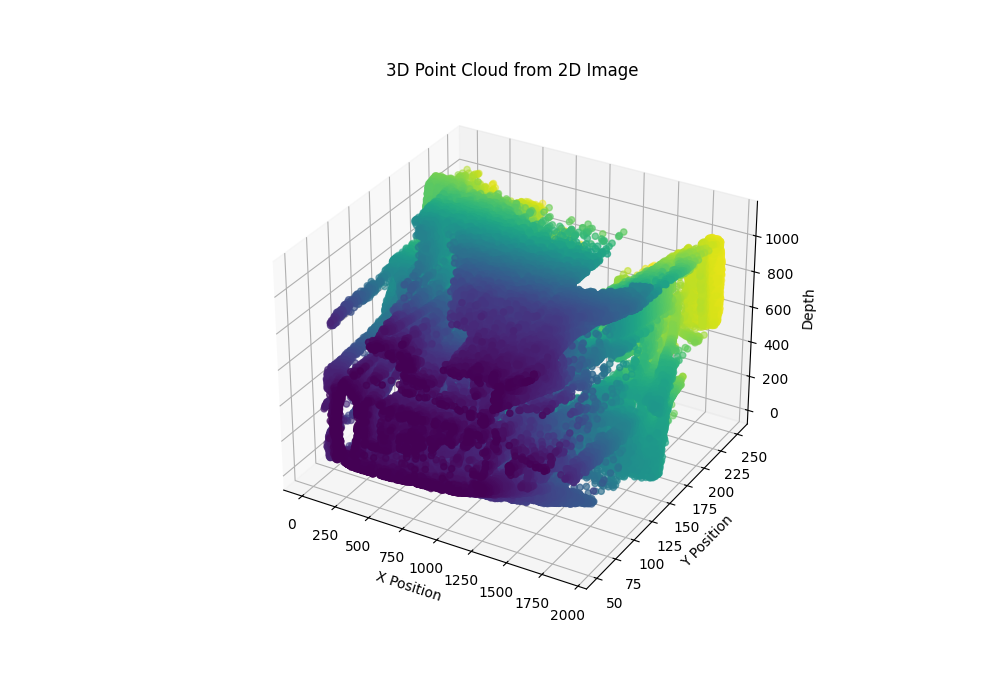

In [5]:
import numpy as np
import cv2

def depth_to_pointcloud(depth_map, focal_length, center):
    # Get the dimensions of the depth map
    height, width = depth_map.shape

    # Create a meshgrid of pixel coordinates
    x = np.linspace(0, width - 1, width)
    y = np.linspace(0, height - 1, height)
    x, y = np.meshgrid(x, y)

    # Normalize the pixel coordinates
    x = (x - center[0]) / focal_length[0]
    y = (y - center[1]) / focal_length[1]

    # Replicate the depth map for each dimension
    z = depth_map
    x = x * z
    y = y * z

    # Stack the coordinates in a point cloud
    point_cloud = np.dstack((x, y, z))
    return point_cloud.reshape(-1, 3)

# Example usage
depth_map = cv2.imread('depth_map.png', cv2.IMREAD_UNCHANGED)  # Load a depth map
focal_length = (525, 525)  # Example focal length, adjust accordingly
center = (depth_map.shape[1]//2, depth_map.shape[0]//2)  # Camera center, typically image center

point_cloud = depth_to_pointcloud(depth_map, focal_length, center)
print(point_cloud)  # Print the generated point cloud array
